In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
from PIL import Image
import matplotlib.patches as patches
import numpy as np
from sklearn.utils import shuffle

In [2]:
labels_dir = os.path.join(os.getcwd(),'Clean', 'train', 'labels')
labels_paths = [os.path.join(labels_dir, label) for label in os.listdir(labels_dir) if label.endswith('.txt')]

In [3]:
def yoloToBbox(x, y, width, height):
    IMG_WIDTH = 132
    IMG_HEIGHT = 139
    xmin = (x - width / 2) * IMG_WIDTH
    ymin = (y - height / 2) * IMG_HEIGHT
    xmax = (x + width / 2) * IMG_WIDTH
    ymax = (y + height / 2) * IMG_HEIGHT
    return xmin, ymin, xmax, ymax

In [4]:
df = pd.DataFrame(columns=["name", "bbox", "area"])
for i, label in enumerate(labels_paths):
    with open(label, 'r') as file:
        lines = file.readlines()
        idx, x_center, y_center, width, height = list(map(float, lines[0].strip().split()))
        xmin, ymin, xmax, ymax = yoloToBbox(x_center, y_center, width, height)
        tumor_area = ((ymax-ymin)/139) * ((xmax-xmin)/132)
        bbox = [xmin, ymin, xmax, ymax]
        df.loc[i] = [label, bbox, tumor_area]

In [5]:
list = [x for x in range (0,100,5)]
list=[x / 100 for x in list]
df["area"].describe(list)

count    6745.000000
mean        0.145208
std         0.111713
min         0.000055
0%          0.000055
5%          0.004578
10%         0.016351
15%         0.029758
20%         0.044147
25%         0.056464
30%         0.070961
35%         0.085023
40%         0.098659
45%         0.111838
50%         0.127371
55%         0.143013
60%         0.157129
65%         0.173774
70%         0.190429
75%         0.207107
80%         0.229562
85%         0.259767
90%         0.300109
95%         0.350687
max         0.784009
Name: area, dtype: float64

In [6]:
def prinfFromDf(df):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for i in range(9):
        label_path = df["name"].iloc[i]
        bbox = df["bbox"].iloc[i]
        img_path = label_path.replace("txt", "jpg")
        img_path = img_path.replace("labels", "images")

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        ax = axes[i // 3, i % 3]  # Get the correct axis
        ax.imshow(image)
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.axis('off')  # Hide the axes

    plt.tight_layout()
    plt.show()

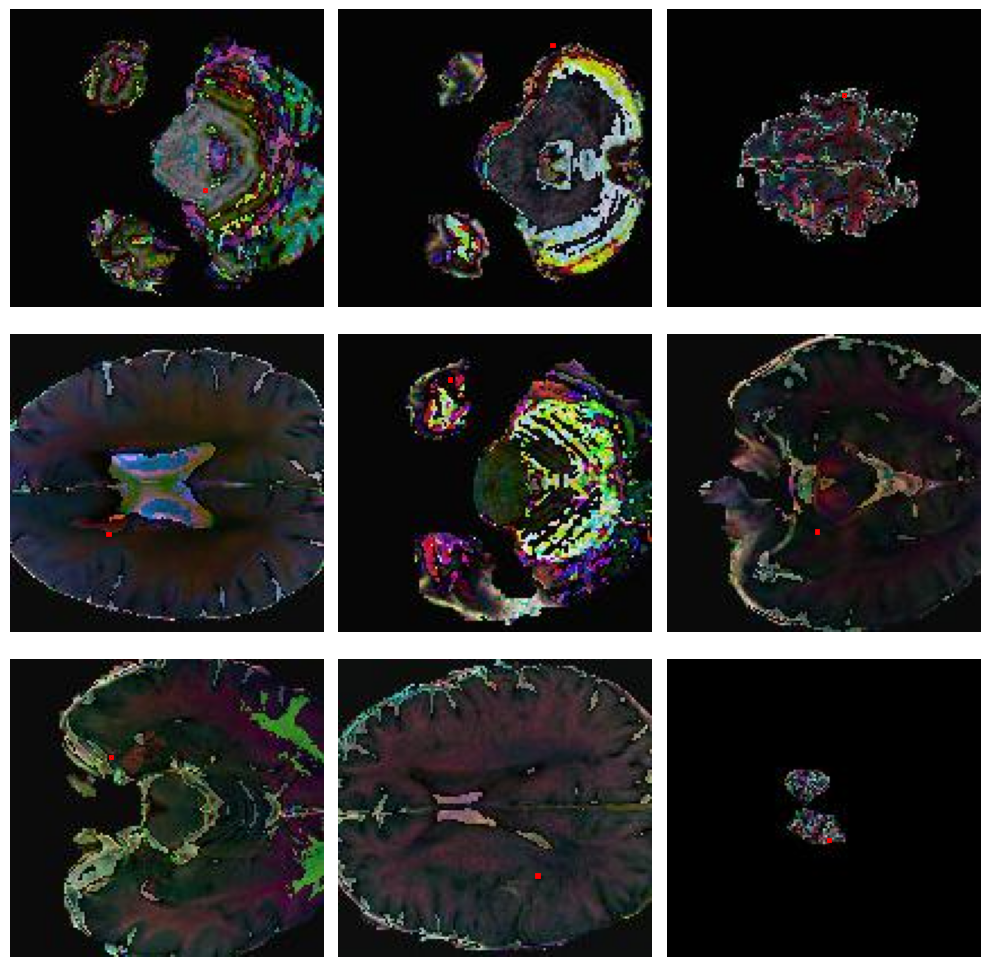

In [7]:
#small boxes:
prinfFromDf(df.sort_values("area"))

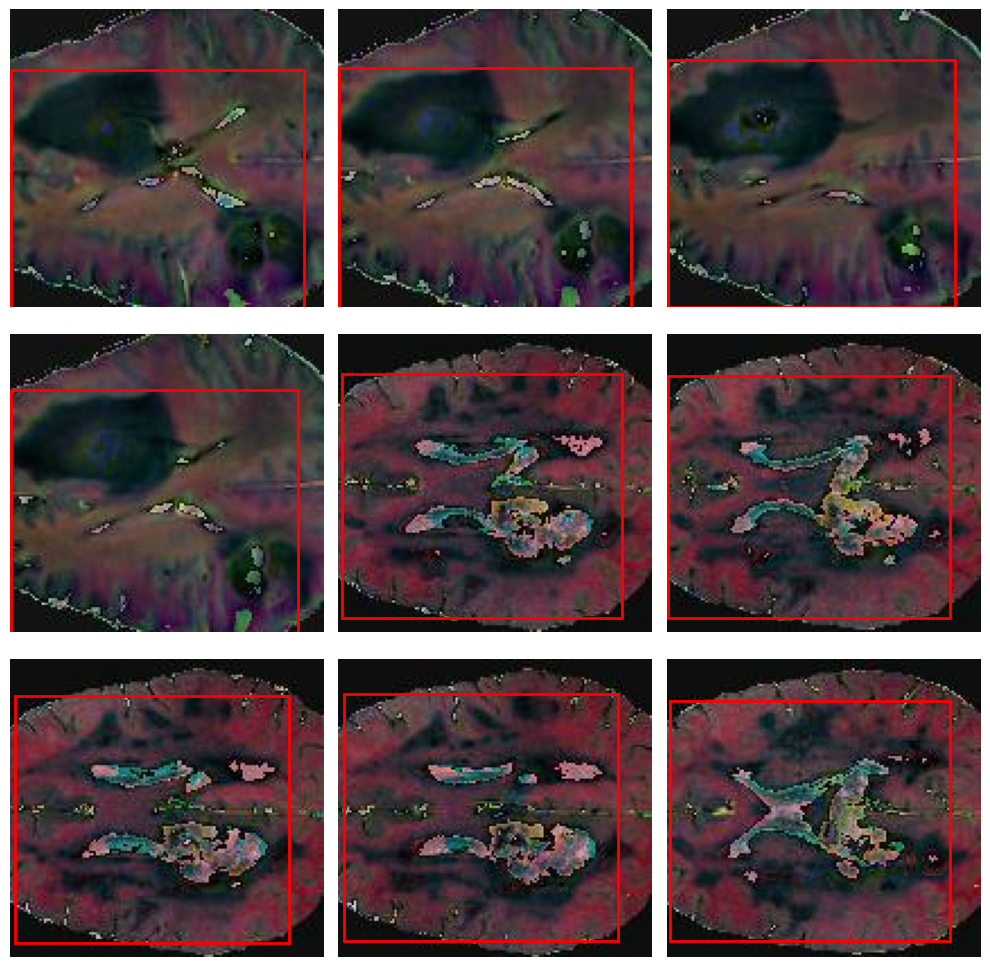

In [13]:
#big boxes: 
prinfFromDf(df.sort_values("area", ascending=False))

C:\Users\danid\AppData\Local\Temp\ipykernel_10404\1445939986.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fix = df[df["area"]>np.percentile(df["area"],10)] [df["area"]<np.percentile(df["area"],99)]


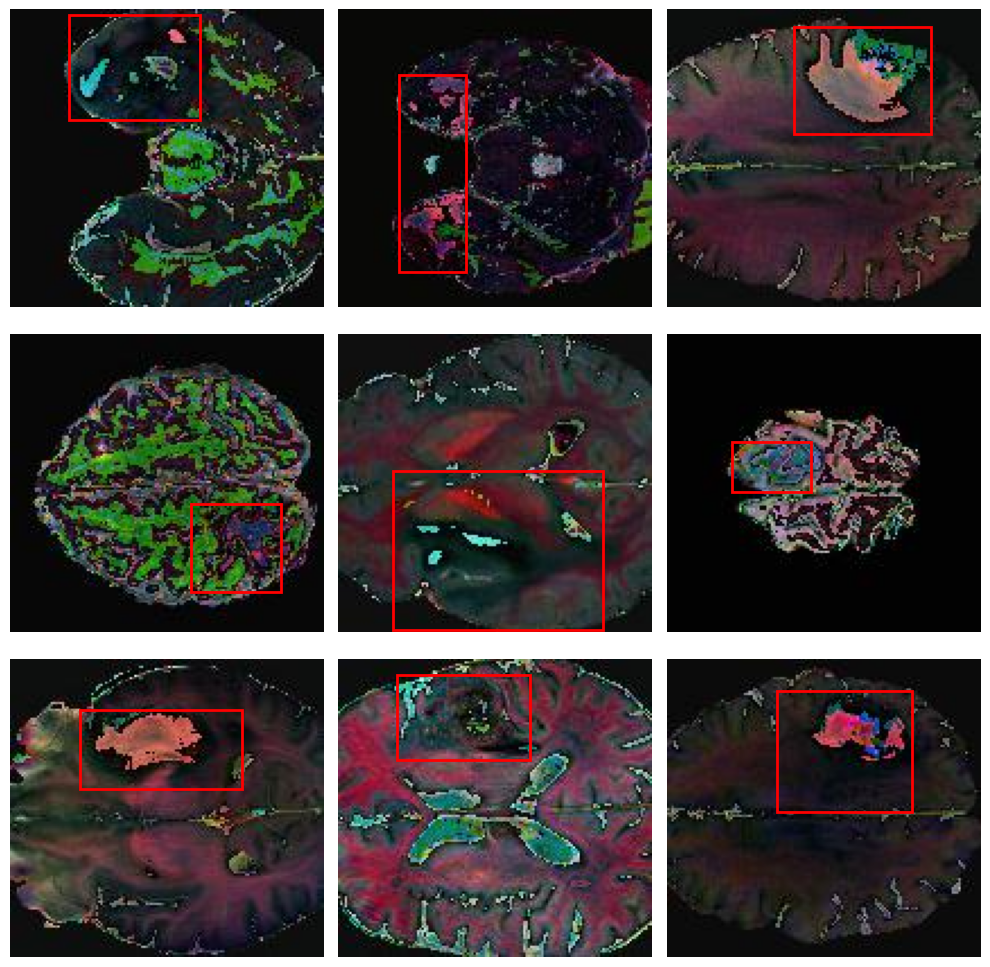

In [11]:
#normal boxes: 
df_fix = df[df["area"]>np.percentile(df["area"],10)] [df["area"]<np.percentile(df["area"],99)]
df_fix = shuffle(df_fix)
prinfFromDf(df_fix)